2024-05-25 22:24:52.791729: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


Found 8135 files belonging to 2 classes.


2024-05-25 22:24:53.377760: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2024-05-25 22:24:53.406569: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-05-25 22:24:53.406648: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 3090 computeCapability: 8.6
coreClock: 1.695GHz coreCount: 82 deviceMemorySize: 23.69GiB deviceMemoryBandwidth: 871.81GiB/s
2024-05-25 22:24:53.406658: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2024-05-25 22:24:53.407970: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2024-05-25 22:24:53.407987: I tensorflow/stream_executor/pl

Class names: ['언어+뇌신경장애', '청각+뇌신경장애']
Class distribution: [1572. 6563.]
Image batch shape: (32, 28, 28, 3)
Label batch shape: (32, 2)


/home/iai/anaconda3/envs/deeplearning/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 52397 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/iai/anaconda3/envs/deeplearning/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 44033 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/iai/anaconda3/envs/deeplearning/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 45516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/iai/anaconda3/envs/deeplearning/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 49888 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/iai/anaconda3/envs/deeplearning/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 44221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/iai/

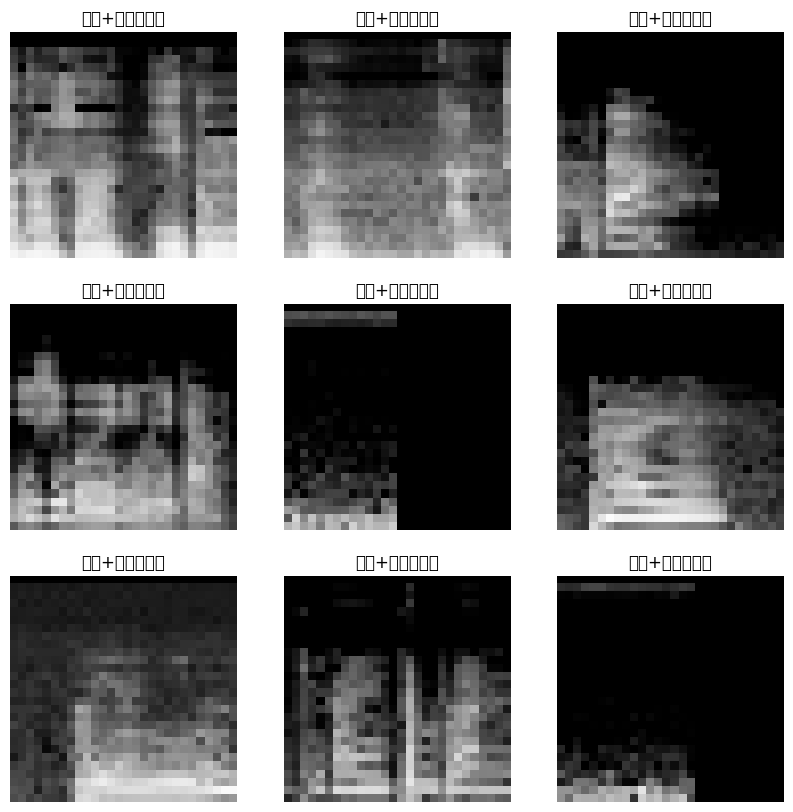

Train class distribution: [ 943. 3938.]
Validation class distribution: [ 315. 1312.]
Test class distribution: [ 314. 1313.]
Train Image batch shape: (32, 28, 28, 3)
Train Label batch shape: (32, 2)


/home/iai/anaconda3/envs/deeplearning/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 52397 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/iai/anaconda3/envs/deeplearning/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 44033 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/iai/anaconda3/envs/deeplearning/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 45516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/iai/anaconda3/envs/deeplearning/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 49888 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/iai/anaconda3/envs/deeplearning/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 44221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/iai/

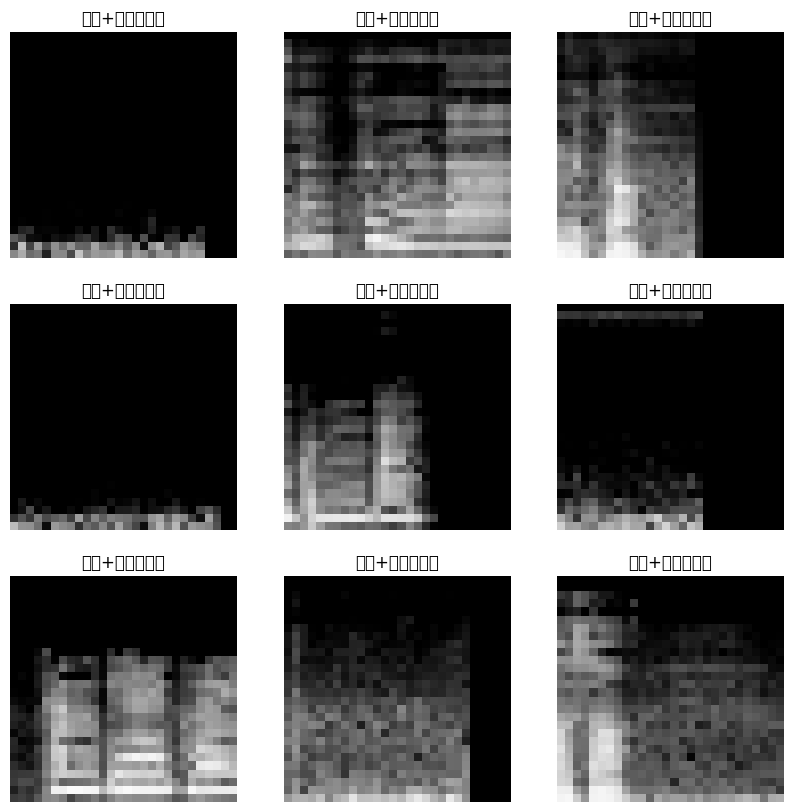

Validation Image batch shape: (32, 28, 28, 3)
Validation Label batch shape: (32, 2)
Test Image batch shape: (32, 28, 28, 3)
Test Label batch shape: (32, 2)


In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
import numpy as np
import matplotlib.pyplot as plt

# 데이터 디렉토리 경로
data_dir = "/home/iai/Desktop/son/deeplearningproject/결과"

# 랜덤 시드 고정
random_seed = 42
tf.random.set_seed(random_seed)
np.random.seed(random_seed)

# 데이터 로드
batch_size = 32
img_height = 28
img_width = 28

dataset = image_dataset_from_directory(
    data_dir,
    image_size=(img_height, img_width),
    label_mode='categorical',  # 레이블을 원-핫 인코딩 형식으로 반환
    batch_size=batch_size
)

# 클래스 비율 확인
class_names = dataset.class_names
print(f"Class names: {class_names}")

class_counts = np.zeros(len(class_names))
for _, labels in dataset:
    class_counts += np.sum(labels.numpy(), axis=0)

print(f"Class distribution: {class_counts}")

# 데이터셋에서 이미지 shape 확인
for images, labels in dataset.take(1):
    print(f"Image batch shape: {images.shape}")
    print(f"Label batch shape: {labels.shape}")
    plt.figure(figsize=(10, 10))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[np.argmax(labels[i])])
        plt.axis("off")
    plt.show()
from sklearn.model_selection import train_test_split
# 데이터셋을 numpy array로 변환
def dataset_to_numpy(dataset):
    images = []
    labels = []
    for img_batch, label_batch in dataset:
        images.append(img_batch.numpy())
        labels.append(label_batch.numpy())
    return np.concatenate(images), np.concatenate(labels)

images, labels = dataset_to_numpy(dataset)

# 데이터셋을 3:1:1 비율로 나누기
train_images, temp_images, train_labels, temp_labels = train_test_split(
    images, labels, test_size=0.4, stratify=labels, random_state=random_seed)

val_images, test_images, val_labels, test_labels = train_test_split(
    temp_images, temp_labels, test_size=0.5, stratify=temp_labels, random_state=random_seed)

# numpy array를 tf.data.Dataset으로 변환
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).batch(batch_size)
val_dataset = tf.data.Dataset.from_tensor_slices((val_images, val_labels)).batch(batch_size)
test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels)).batch(batch_size)

# 각 데이터셋의 클래스 비율 확인
def get_class_distribution(labels):
    class_counts = np.sum(labels, axis=0)
    return class_counts

print(f"Train class distribution: {get_class_distribution(train_labels)}")
print(f"Validation class distribution: {get_class_distribution(val_labels)}")
print(f"Test class distribution: {get_class_distribution(test_labels)}")

# 데이터셋에서 이미지 shape 확인
for images, labels in train_dataset.take(1):
    print(f"Train Image batch shape: {images.shape}")
    print(f"Train Label batch shape: {labels.shape}")
    plt.figure(figsize=(10, 10))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[np.argmax(labels[i])])
        plt.axis("off")
    plt.show()

for images, labels in val_dataset.take(1):
    print(f"Validation Image batch shape: {images.shape}")
    print(f"Validation Label batch shape: {labels.shape}")

for images, labels in test_dataset.take(1):
    print(f"Test Image batch shape: {images.shape}")
    print(f"Test Label batch shape: {labels.shape}")

Epoch 1/100


2024-05-25 22:24:54.869093: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2024-05-25 22:24:55.161357: I tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded cuDNN version 8101
2024-05-25 22:24:55.535535: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11


 27/153 [====>.........................] - ETA: 0s - loss: 0.5191 - accuracy: 0.8137  

2024-05-25 22:24:55.756218: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.11
2024-05-25 22:24:55.785236: I tensorflow/stream_executor/cuda/cuda_blas.cc:1838] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


153/153 [==============================] - 2s 3ms/step - loss: 0.4638 - accuracy: 0.8175 - val_loss: 0.5074 - val_accuracy: 0.8199
Epoch 2/100
153/153 [==============================] - 0s 2ms/step - loss: 0.3732 - accuracy: 0.8500 - val_loss: 0.3715 - val_accuracy: 0.8586
Epoch 3/100
153/153 [==============================] - 0s 2ms/step - loss: 0.3103 - accuracy: 0.8715 - val_loss: 0.3841 - val_accuracy: 0.8341
Epoch 4/100
153/153 [==============================] - 0s 2ms/step - loss: 0.2562 - accuracy: 0.8933 - val_loss: 0.2968 - val_accuracy: 0.8881
Epoch 5/100
153/153 [==============================] - 0s 2ms/step - loss: 0.2129 - accuracy: 0.9107 - val_loss: 0.3227 - val_accuracy: 0.8789
Epoch 6/100
153/153 [==============================] - 0s 2ms/step - loss: 0.1953 - accuracy: 0.9234 - val_loss: 0.2997 - val_accuracy: 0.8881
Epoch 7/100
153/153 [==============================] - 0s 2ms/step - loss: 0.1720 - accuracy: 0.9295 - val_loss: 0.5682 - val_accuracy: 0.8697
Epoch 8/100

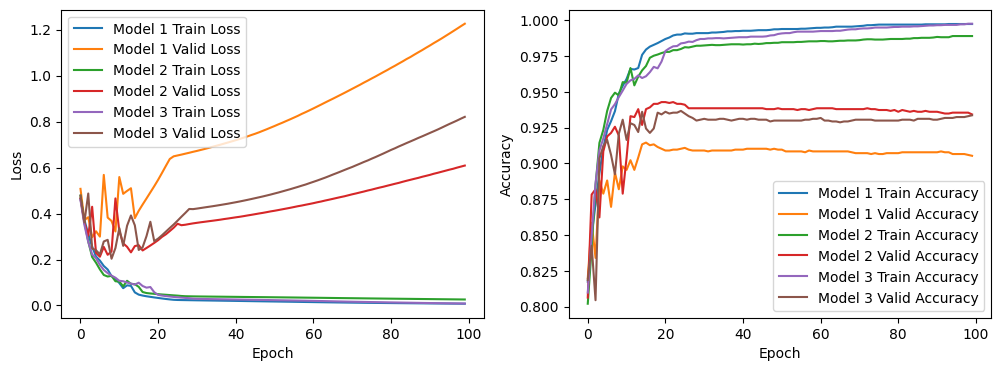

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt
import os

checkpoint_dir = "/home/iai/Desktop/son/deeplearningproject/best_model"

# 모델 정의
def create_baseline1_model(kernel_size=(3, 3)):
    model = tf.keras.Sequential([
        layers.InputLayer(input_shape=(28, 28, 3)),
        layers.Conv2D(8, kernel_size, activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.AveragePooling2D((2, 2)),

        layers.Conv2D(16, kernel_size, activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.AveragePooling2D((2, 2)),

        layers.Conv2D(32, kernel_size, activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.AveragePooling2D((2, 2)),

        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dense(512, activation='relu'),
        layers.Dense(128, activation='relu'),
        layers.Dense(2, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

def train_and_evaluate_model(model, train_dataset, val_dataset, test_dataset, model_name):
    reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, min_lr=0.00001)
    checkpoint_path_ensemble = os.path.join(checkpoint_dir, f"best_model_ensemble3_{model_name}.h5")
    checkpoint_ensemble = tf.keras.callbacks.ModelCheckpoint(checkpoint_path_ensemble, monitor='val_loss', save_best_only=True, mode='min')

    history = model.fit(
        train_dataset,
        validation_data=val_dataset,
        epochs=100,
        batch_size=20,
        callbacks=[checkpoint_ensemble, reduce_lr],
        verbose=1
    )

    model.load_weights(checkpoint_path_ensemble)

    loss, accuracy = model.evaluate(test_dataset)
    print(f"Test loss: {loss}")
    print(f"Test accuracy: {accuracy}")

    y_true = np.concatenate([y for x, y in test_dataset], axis=0)
    y_pred = model.predict(test_dataset)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(y_true, axis=1)

    report = classification_report(y_true_classes, y_pred_classes, target_names=class_names, output_dict=True)
    return history, report, y_pred, y_true_classes

def calculate_ece(y_true, y_prob, n_bins=10):
    bins = np.linspace(0.0, 1.0, n_bins + 1)
    bin_indices = np.digitize(np.max(y_prob, axis=1), bins) - 1
    ece = 0.0
    for i in range(n_bins):
        bin_mask = bin_indices == i
        bin_size = np.sum(bin_mask)
        if bin_size > 0:
            bin_accuracy = np.mean(y_true[bin_mask] == np.argmax(y_prob[bin_mask], axis=1))
            bin_confidence = np.mean(np.max(y_prob[bin_mask], axis=1))
            ece += np.abs(bin_accuracy - bin_confidence) * bin_size / len(y_true)
    return ece

def calculate_oe(y_true, y_prob, n_bins=10):
    bins = np.linspace(0.0, 1.0, n_bins + 1)
    bin_indices = np.digitize(np.max(y_prob, axis=1), bins) - 1
    oe = 0.0
    for i in range(n_bins):
        bin_mask = bin_indices == i
        bin_size = np.sum(bin_mask)
        if bin_size > 0:
            bin_accuracy = np.mean(y_true[bin_mask] == np.argmax(y_prob[bin_mask], axis=1))
            bin_confidence = np.mean(np.max(y_prob[bin_mask], axis=1))
            if bin_confidence > bin_accuracy:
                oe += (bin_confidence - bin_accuracy) * bin_size / len(y_true)
    return oe

# 커널 크기가 다른 여러 모델 생성
kernel_sizes = [(3, 3), (5, 5), (7, 7)]
model_list = []
histories = []
reports = []
y_preds = []

for kernel_size in kernel_sizes:
    model = create_baseline1_model(kernel_size=kernel_size)
    history, report, y_pred, y_true_classes = train_and_evaluate_model(model, train_dataset, val_dataset, test_dataset, f"kernel_{kernel_size[0]}x{kernel_size[1]}")
    model_list.append(model)
    histories.append(history)
    reports.append(report)
    y_preds.append(y_pred)

# 앙상블 예측
y_pred_ensemble = np.mean(y_preds, axis=0)
y_pred_classes_ensemble = np.argmax(y_pred_ensemble, axis=1)

# 앙상블 분류 보고서 생성
report_ensemble = classification_report(y_true_classes, y_pred_classes_ensemble, target_names=class_names, output_dict=True)
accuracy_ensemble = report_ensemble['accuracy']
recall_ensemble = report_ensemble['weighted avg']['recall']
precision_ensemble = report_ensemble['weighted avg']['precision']
f1_score_ensemble = report_ensemble['weighted avg']['f1-score']

print(f"Ensemble Accuracy: {accuracy_ensemble}")
print(f"Ensemble Recall: {recall_ensemble}")
print(f"Ensemble Precision: {precision_ensemble}")
print(f"Ensemble F1-score: {f1_score_ensemble}")

# ECE와 OE 계산
ece_ensemble = calculate_ece(y_true_classes, y_pred_ensemble)
oe_ensemble = calculate_oe(y_true_classes, y_pred_ensemble)

print(f"Ensemble ECE: {ece_ensemble}")
print(f"Ensemble OE: {oe_ensemble}")

# 학습 과정 시각화
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
for i, history in enumerate(histories):
    plt.plot(history.history['loss'], label=f'Model {i+1} Train Loss')
    plt.plot(history.history['val_loss'], label=f'Model {i+1} Valid Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
for i, history in enumerate(histories):
    plt.plot(history.history['accuracy'], label=f'Model {i+1} Train Accuracy')
    plt.plot(history.history['val_accuracy'], label=f'Model {i+1} Valid Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()
